In [2]:
check = input('Can you confirm if this is correct? (y/n)').lower()
while check != 'y':
    check = input('Can you confirm if this is correct? (y/n)').lower()
else:
    print('Great! Thanks for confirming.')

Can you confirm if this is correct? (y/n)n
Can you confirm if this is correct? (y/n)n
Can you confirm if this is correct? (y/n)y
Great! Thanks for confirming.


In [17]:
import pandas as pd
df = pd.read_csv('simulated_ddos_data.csv')
df.head()

,magnitude,record_type,is_ddos,uuid,timestamp
0,3917.150671,normal,0,1,2020-07-01 00:01:00
1,9379.403504,normal,0,2,2020-07-01 00:02:00
2,1544.080967,normal,0,3,2020-07-01 00:03:00
3,3403.995906,normal,0,4,2020-07-01 00:04:00
4,4883.865333,normal,0,5,2020-07-01 00:05:00


In [21]:
malicious = df.loc[df.is_ddos==1,:].copy().reset_index(drop=True)
malicious.head()

,magnitude,record_type,is_ddos,uuid,timestamp
0,24376.432653,DDoS,1,1,2020-07-01 00:01:00
1,26458.007847,DDoS,1,2,2020-07-01 00:02:00
2,25435.641576,DDoS,1,3,2020-07-01 00:03:00
3,23201.816407,DDoS,1,4,2020-07-01 00:04:00
4,20026.438697,DDoS,1,5,2020-07-01 00:05:00


In [58]:
df.loc[df.is_ddos==1,'magnitude'].copy().reset_index(drop=True).median()

25117.52355716445

In [22]:
normal = df.loc[df.is_ddos==0,:].copy().reset_index(drop=True)
print(len(malicious.index), len(normal.index), len(malicious.index) + len(normal.index) )

300 86100 86400


In [25]:
sorted(list(df.is_ddos.unique()))

[0, 1]

In [72]:
normal.record_type.size

86100

In [59]:
import os

In [61]:
os.path.isdir('/home/kali/projects')

True

In [69]:
home = os.path.expanduser('~')
os.path.isdir(f'{home}/projects')


True

In [67]:
os.path.expanduser('~')

'/home/kali'

In [132]:
os.path.isdir(os.path.join(home, 'cream'))

True

In [109]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math

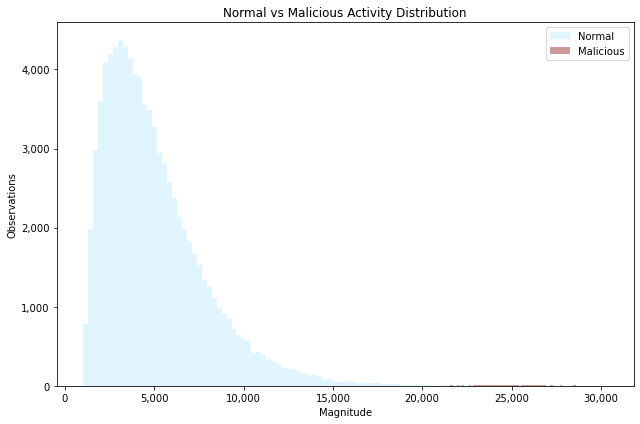

In [102]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=False, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=False, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('Observations')
plt.title('Normal vs Malicious Activity Distribution')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

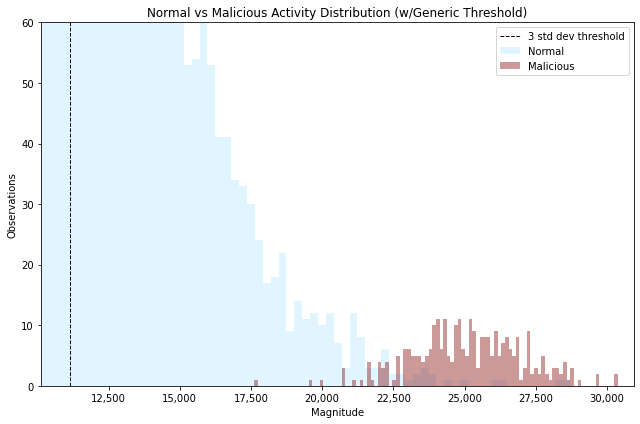

In [131]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=False, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=False, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('Observations')
plt.title('Normal vs Malicious Activity Distribution (Zoomed in w/Generic Threshold)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
norm_avg = 5015
norm_stdev = 2045
mal_avg = 25110
mal_stdev = 1940
plt.xlim(norm_avg + (2.5 * norm_stdev),mal_avg + (3 * mal_stdev))
plt.ylim(0,300*.20)
plt.axvline(x=norm_avg + (3 * norm_stdev), color='k', linestyle='dashed', linewidth=1, label='3 std dev threshold')
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

In [117]:
est_mal_height = (1 / (mal_stdev * math.sqrt(2 * math.pi))) * mal_avg
print(est_mal_height)

5.163629206639163


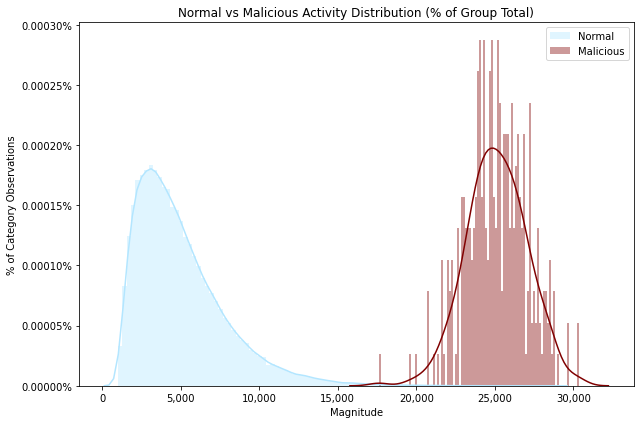

In [100]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9, 6)
sns.distplot(df.loc[df.is_ddos == 0, 'magnitude'], kde=True, bins=100, label='Normal', color='#b3e6ff')
sns.distplot(df.loc[df.is_ddos == 1, 'magnitude'], kde=True, bins=100, label='Malicious', color='#800000')
plt.xlabel('Magnitude')
plt.ylabel('% of Category Observations')
plt.title('Normal vs Malicious Activity Distribution (% of Group Total)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.tight_layout()
plt.savefig("test.png")

In [135]:
true_positives = df[(df.is_ddos == 1) & (df.magnitude >= 12000)]
true_positives.shape[0]

300

In [139]:
import webbrowser
webbrowser.open_new_tab('/home/kali/cream/lol/exploratory_data_focused_histogram.png')

True

In [160]:
df.iloc[0,:].magnitude

3917.150671026197